# IMDb Movie Rating Prediction System


In [2]:
#importing some basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Collecting data with the help of web scraping

Web scraping is the process of using bots to extract content and data from a website.
Each page holds 100 movies

getting the links of movie web pages

In [3]:
#necessary libraries for web scraping

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests

from helper_functions.imdb_big_scrape import get_movie_links
# calling .py file for web scraping 

Number_of_pages = 1
movie_links = get_movie_links(Number_of_pages)

# scaping the desired data from the web pages and storing it in pickle format

In [4]:
import pickle
%load_ext autoreload
%autoreload 2
#to reload modules before executing user code.

from helper_functions.getting_info import get_movie_data


count = 0
movie_data_list = []
for link in movie_links:
    movie_data_list.append(get_movie_data(link))
    count += 1
    if count % 50 == 0:
        with open('IMDb_top_2000s.pickle', 'wb') as to_write:
            pickle.dump(movie_data_list, to_write)
# Create list with all movies from movie links

In [5]:
movie_page_info = pd.DataFrame(movie_data_list)
# Turn data into a DataFrame for easy analysis

stored the scraped data another file

In [9]:
#these datsets have alredy been scraped and stored in data folder
movies_8000 = pd.DataFrame(pd.read_pickle('data/IMDb_8000.pickle'))
df1 = pd.DataFrame(pd.read_pickle('data/IMDb_top_movies.pickle'))
df2 = pd.DataFrame(pd.read_pickle('data/IMDb_top_2000s.pickle'))

# IMDB_8000 contains 8000 movies between 2015 and 2020
# IMDb_top_movies supplements the data with top rated movies between 2010 and 2020
# IMDB_top_2000s supplements more top movies in the 2000s

movies_8100 = pd.concat([movies_8000,df1,df2])

# Data preprocessing and EDA

In [21]:
movies_8100.head()

,movie title,imdb rating,imdb raters,mpaa,genres,director,writer,stars,country,language,release date,budget,opening weekend,gross usa,cumulative worldwide,production companies,runtime (min)
0,Mulan,5.4,57966.0,PG-13,"[Action, Adventure, Drama, Family]",Niki Caro,Rick Jaffa,"[Yifei Liu, Donnie Yen, Li Gong]",USA,English,2020-09-04,200000000.0,NaN,NaN,66800000.0,"[Walt Disney Pictures, Jason T. Reed Productio...",115.0
1,The Invisible Man,7.1,136012.0,R,"[Horror, Mystery, Sci-Fi, Thriller]",Leigh Whannell,Leigh Whannell,"[Elisabeth Moss, Oliver Jackson-Cohen, Harriet...",Canada,English,2020-02-28,7000000.0,28205665.0,64914050.0,130722137.0,"[Universal Pictures, Blumhouse Productions, Go...",124.0
2,On the Basis of Sex,7.1,23877.0,PG-13,"[Biography, Drama]",Mimi Leder,Daniel Stiepleman,"[Felicity Jones, Armie Hammer, Justin Theroux]",USA,English,2019-01-11,20000000.0,686355.0,24704837.0,38755900.0,"[Alibaba Pictures, Amblin Partners, DreamWorks]",120.0
3,The Gentlemen,7.9,188297.0,R,"[Action, Comedy, Crime]",Guy Ritchie,Guy Ritchie,"[Matthew McConaughey, Charlie Hunnam, Michelle...",UK,English,2020-01-24,22000000.0,10651884.0,36471795.0,115171795.0,"[STX Films, Miramax, Toff Guy Films]",113.0
4,Knives Out,7.9,394738.0,PG-13,"[Comedy, Crime, Drama, Mystery, Thriller]",Rian Johnson,Rian Johnson,"[Daniel Craig, Chris Evans, Ana de Armas]",USA,English,2019-11-27,40000000.0,26769548.0,165363234.0,309232797.0,"[Lionsgate, Media Rights Capital (MRC), T-Street]",130.0


In [22]:
movies_8100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8100 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie title           8100 non-null   object 
 1   imdb rating           7693 non-null   float64
 2   imdb raters           7693 non-null   float64
 3   mpaa                  4126 non-null   object 
 4   genres                8092 non-null   object 
 5   director              8090 non-null   object 
 6   writer                8068 non-null   object 
 7   stars                 7896 non-null   object 
 8   country               8100 non-null   object 
 9   language              8100 non-null   object 
 10  release date          7372 non-null   object 
 11  budget                2735 non-null   float64
 12  opening weekend       1529 non-null   float64
 13  gross usa             1623 non-null   float64
 14  cumulative worldwide  2196 non-null   float64
 15  production companies  7

In [23]:
# Copy the original dataframe

movies_df = movies_8100.copy()
movies_df.drop_duplicates(subset=['movie title'],inplace=True) #remove duplicates

In [24]:
movies_df.set_index('movie title',inplace=True)
# Reset the index to be the Movie Title

In [25]:
movies_df_drop = movies_df.dropna(subset=['budget'])
# Drop movies without budget data

In [26]:
movies_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2655 entries, Mulan to Cinderella Man
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb rating           2495 non-null   float64
 1   imdb raters           2495 non-null   float64
 2   mpaa                  1581 non-null   object 
 3   genres                2654 non-null   object 
 4   director              2652 non-null   object 
 5   writer                2651 non-null   object 
 6   stars                 2594 non-null   object 
 7   country               2655 non-null   object 
 8   language              2655 non-null   object 
 9   release date          2464 non-null   object 
 10  budget                2655 non-null   float64
 11  opening weekend       931 non-null    float64
 12  gross usa             957 non-null    float64
 13  cumulative worldwide  1118 non-null   float64
 14  production companies  2480 non-null   object 
 15  runtime (min

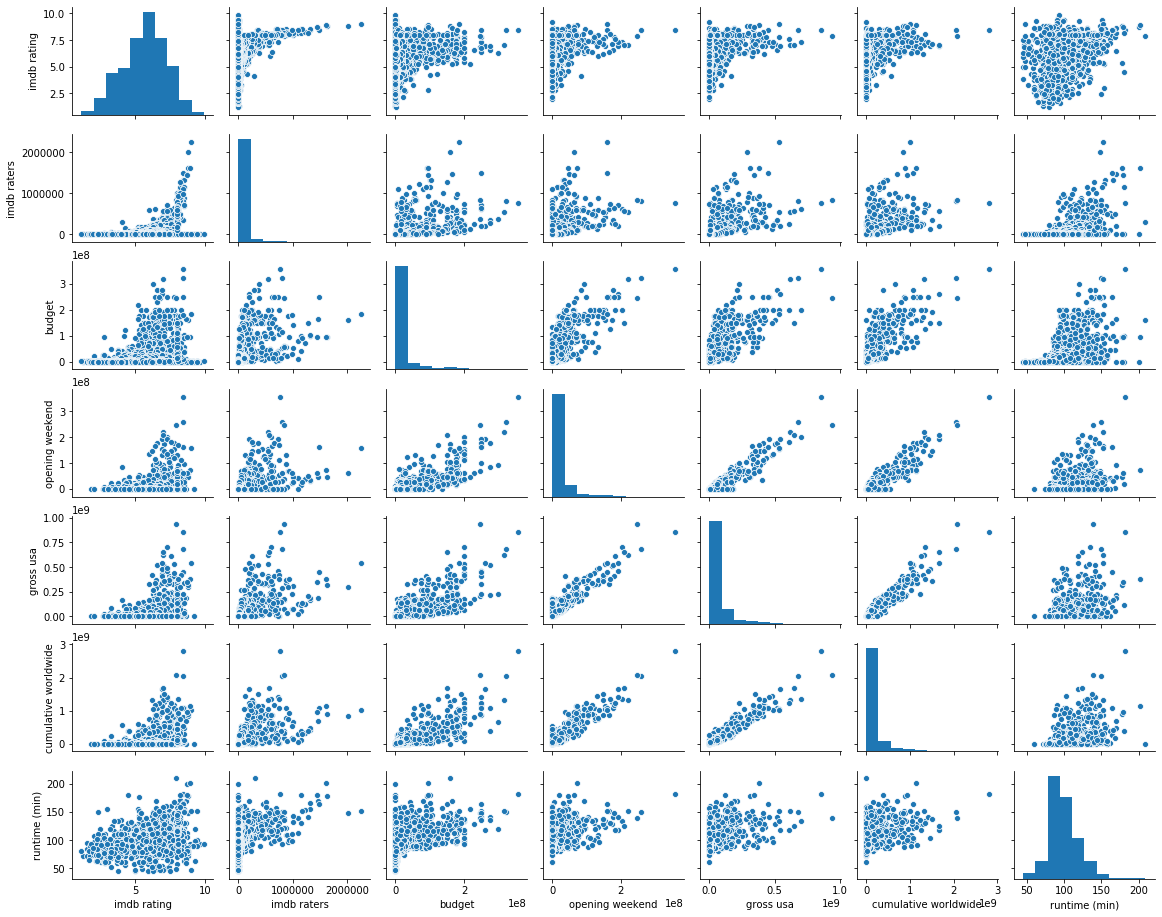

In [29]:
# Visualize some relationships
sns.pairplot(movies_df_drop, height=1.8, aspect=1.25)